# How Many Dice Can You Roll the Same? (2024.10.04)

link: https://thefiddler.substack.com/p/how-many-dice-can-you-roll-the-same

## I. Puzzle

From Ryan Lafitte comes a delectable dilemma of dice:

When supervising the Board Games club at the high school where he teaches, Ryan saw a group break out TENZI. In this game, each player has 10 dice of the same color (in case the rolls get into each others’ areas, presumably).

To get started, you roll all 10 dice—whichever number comes up most frequently becomes your target number. In the event multiple numbers come up most frequently, you can choose your target number from among them. At this point, you put aside all the dice that came up with your target number.

From there, you continue rolling any remaining dice, putting aside any that come up with your target number. Once all 10 dice show the same number, you yell, “Tenzi!” If you’re the first to do so, you win.

Now, consider a simplified version of the game in which you begin with three total dice (call it “THREEZI”).

On average, how many dice will you put aside after first rolling all three?

# II. Solution

## II.1. Math

The average number of dice we will put away after the first roll depends on how many dice have the same number and how probable are the results. To get three times the same number and therefore to put all three dice away the probability is $6 \cdot \frac{1}{6^3}=\frac{1}{36}$.
To get one number two times, the probability is $3 \cdot \frac{6 \cdot 1 \cdot 5}{6^3}= \frac{15}{36}$ and to get three different numbers it is $\frac{6 \cdot 5 \cdot 4}{6^3}= \frac{20}{36}$.

The average number of dice we will put away after the first roll is $$1 \cdot \frac{20}{36}+ 2\cdot \frac{15}{36}+3 \cdot \frac{1}{36}=\frac{53}{36}\approx 1.47$$.

## II.2. Monte Carlo

We will check the result using a monte carlo simulation:

In [3]:
import numpy as np

In [10]:
trials = 1000000
results = 0
n_dice = 3

for trial in range(trials):
	dice_arr = np.random.randint(1, 7, n_dice)
	_, counts = np.unique(dice_arr, return_counts=True)
	results +=  max(counts)

print(results/trials)

1.472157


# III. Further questions

How many dice will you on average put away per round until the game is over? 

As the game ends if one of the player is done, the average depends on the number of players. We frist assume that there is only one player.

## III.1. Games with one player

### III.1.1. Markov chain
We deﬁne the random variable $X_n$ as the state after $n$-th dice have not shown the target number yet. State 0 is the absorbing state when all dice show the target number. The process $\{X_n\}$ is an Markov chain with state space $I = {3, 2, 1, 0}$. The matrix $P = (p_{ij})$ of one-step transition probabilities is given by:


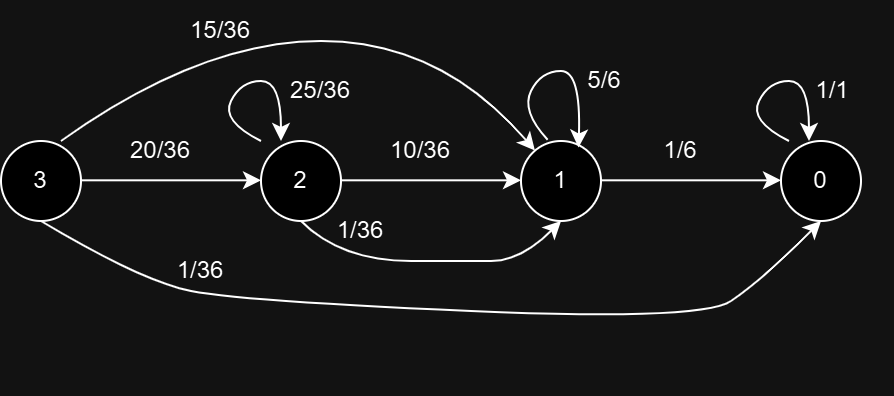

In [1]:
from IPython import display
display.Image("files/2024.10.06 markov.png")

The random variable $R$ denotes the number of rounds to play. The variable $R$ takes larger values than $r$ if and only if the Markov chain has not reached the absorbing state 0 in the ﬁrst $r$ transitions. Hence, 
$$P(R>r) = P (X_i \neq 0 \text{ for }i=1,\dots, r \:|\: X_0 = 3)$$
We can calculate the probability $P(R > r)$ by multiplying $R$ times the matrix $P$ by itself.

The average number of dice we put aside per round is calculated by

$$3 \cdot \left( \sum_{r=0}^\infty \frac{P(R>r) - P(R>r-1)}{r}\right)^{-1}$$

In [6]:
matrix = np.array([
	[0, 20/36, 15/36, 1/36], 
	[0, 25/36, 10/36, 1/36], 
	[0, 0, 5/6, 1/6], 
	[0, 0, 0, 1]])


mul_iteration = 100

cum_results = [0]

next_matrix = matrix
for i in range(mul_iteration):
	next_matrix = np.dot(matrix, next_matrix)
	cum_results.append(next_matrix[0][3])

p_results = [0,0] + [cum_results[i]-cum_results[i-1] for i in range(1, mul_iteration+1)]

p_index = np.arange(len(p_results))

average_rounds = np.sum(p_results * p_index)

print(f"The player puts on average {3/average_rounds:.3f} dice aside until the game ends.")


The player puts on average 0.358 dice aside until the game ends.


### III.1.1. Monte Carlo simulation
We will check the result with a simulation: 

In [78]:
trials = 500000
results = []

for trial in range(trials):
	n_dice = 3

	# first round
	counter = 1

	dice_arr = np.random.randint(1, 7, n_dice)
	_, counts = np.unique(dice_arr, return_counts=True)
	n_dice -= max(counts)

	# next rounds
	if n_dice != 0:
		while True:
			counter +=1

			dice_arr = np.random.randint(1, 7, n_dice)
			n_dice -= np.count_nonzero(dice_arr == 1)

			if n_dice == 0:
				break		

	results.append(counter)


print(f"The player puts on average {3/(sum(results)/trials):.3f} dice aside until the game ends.")

The player puts on average 0.359 dice aside until the game ends.


## III.2. Games with more than one player

Now, we will calculate how many dice the winner will put away per round if there are more than one player.

In [ ]:
import matplotlib.pyplot as plt

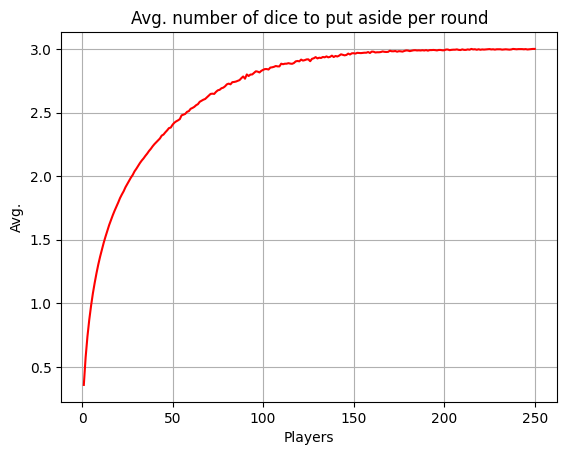

In [105]:
results_per_n_player = []
max_players = 250

 # we will use the random data from 'results'
for i in range(1, max_players+1):
	results_arr = np.array(results)
	new_size = len(results) % i
	if new_size != 0:
		results_arr = ((results_arr[:-(len(results) % i)]))
	results_arr = results_arr.reshape(int(len(results_arr)/i),i)
	average = 3/np.average(np.min(results_arr, axis=1)) # 3 = nb. of dice
	results_per_n_player.append(average)

plt.plot(np.arange(1,max_players+1), results_per_n_player, color = 'r')

plt.title("Avg. number of dice to put aside per round")
plt.xlabel("Players")
plt.ylabel("Avg.")
plt.grid()
